Importing the data using pandas

In [8]:

import pandas as pd

# load data
df = pd.read_csv('all.csv')
print(df.size)
df.head()

2865


,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


Gensim is a python library for NLP tasks, especially for semantic related tasks.
https://radimrehurek.com/gensim/

In [9]:
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation \
                                        , preprocess_string, strip_short, stem_text

Preprocess function for removing the stopwords, punctuation, short words and stemming the words.

In [10]:
# preprocess given text
def preprocess(text):
    
    # clean text based on given filters
    CUSTOM_FILTERS = [lambda x: x.lower(), 
                                remove_stopwords, 
                                strip_punctuation, 
                                strip_short, 
                                stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)
    
    return text

In [11]:
# apply function to all text
df['Text (Clean)'] = df['content'].apply(lambda x: preprocess(x))

In [12]:
df.head()

,author,content,poem name,age,type,Text (Clean)
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,"[let, bird, loudest, lai, sole, arabian, tree,..."
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore,"[sir, charl, chamber, come, write, fairi, quee..."
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,"[vice, run, old, men, saw, far, authent, law, ..."
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,"[man, muse, whilom, mask, time, taught, lowli,..."
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore,"[long, longd, love, again, wisht, obtain, worl..."


In [13]:
from gensim import corpora

# create a dictionary with the corpus
corpus = df['Text (Clean)']
dictionary = corpora.Dictionary(corpus)
len(dictionary)

8150

Creating the bag of words from every poem

In [14]:
bow = [dictionary.doc2bow(text) for text in corpus]

Getting the authors, types, ages and the number of them

In [16]:
unique_authors=df["author"].unique()
author_count= unique_authors.size
print(author_count)
print(unique_authors)

67
['WILLIAM SHAKESPEARE' 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH'
 'THOMAS BASTARD' 'EDMUND SPENSER' 'RICHARD BARNFIELD' 'SIR WALTER RALEGH'
 'QUEEN ELIZABETH I' 'JOHN DONNE' 'JOHN SKELTON' 'CHRISTOPHER MARLOWE'
 'LADY MARY WROTH' 'ROBERT SOUTHWELL, SJ' 'WILLIAM BYRD'
 'GEORGE GASCOIGNE' 'HENRY VIII, KING OF ENGLAND' 'SIR THOMAS WYATT'
 'EN JONSON' 'ORLANDO GIBBONS' 'THOMAS NASHE' 'SIR PHILIP SIDNEY'
 'SECOND BARON VAUX OF HARROWDEN THOMAS, LORD VAUX'
 'HENRY HOWARD, EARL OF SURREY' 'GEORGE CHAPMAN' 'THOMAS CAMPION'
 'ISABELLA WHITNEY' 'SAMUEL DANIEL' 'THOMAS HEYWOOD'
 'GIOVANNI BATTISTA GUARINI' 'SIR EDWARD DYER' 'THOMAS LODGE'
 'JOHN FLETCHER' 'EDGAR LEE MASTERS' 'WILLIAM BUTLER YEATS'
 'FORD MADOX FORD' 'IVOR GURNEY' 'CARL SANDBURG' 'EZRA POUND'
 'ELINOR WYLIE' 'GEORGE SANTAYANA' 'LOUISE BOGAN' 'KENNETH SLESSOR'
 'HART CRANE' 'D. H. LAWRENCE' 'HUGH MACDIARMID' 'E. E. CUMMINGS'
 'LOUIS UNTERMEYER' 'WALLACE STEVENS' 'MARJORIE PICKTHALL'
 'RICHARD ALDINGTON' 'GUILLAUME APOLLINAIRE' '

In [17]:
unique_types=df["type"].unique()
type_count= unique_types.size
print(type_count)
print(unique_types)

3
['Mythology & Folklore' 'Nature' 'Love']


In [18]:
unique_ages=df["age"].unique()
age_count= unique_ages.size
print(age_count)
print(unique_ages)

2
['Renaissance' 'Modern']


In [20]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

def coherence(bow, dictionary,dataframe, number_of_topics):
    
    lsi = LsiModel(bow, num_topics=number_of_topics, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=dataframe['Text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(number_of_topics, coherence_score))

In [22]:


# find the coherence score with a different number of topics
coherence(bow,dictionary,df,author_count)
coherence(bow,dictionary,df,type_count)
coherence(bow,dictionary,df,age_count)

Coherence score with 67 clusters: 0.3487075891043255
Coherence score with 3 clusters: 0.4629980953647754
Coherence score with 2 clusters: 0.23354318722827874


In [28]:
# Get the LsiModel to extract topics by author, type and age
lsiAuthor = LsiModel(bow, num_topics=author_count, id2word=dictionary)
lsiType= LsiModel(bow, num_topics=type_count, id2word=dictionary)
lsiAge= LsiModel(bow, num_topics=age_count, id2word=dictionary)

In [29]:
print(lsiAuthor)
print(lsiType)
print(lsiAge)

LsiModel<num_terms=8150, num_topics=67, decay=1.0, chunksize=20000>
LsiModel<num_terms=8150, num_topics=3, decay=1.0, chunksize=20000>
LsiModel<num_terms=8150, num_topics=2, decay=1.0, chunksize=20000>


In [30]:

# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsiAge.print_topics(num_words=7):
    #print('Words in {}: {}.'.format(unique_ages[topic_num], words))
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: -0.393*"love" + -0.236*"thy" + -0.187*"let" + -0.181*"thou" + -0.171*"like" + -0.158*"doth" + -0.157*"dai".
Words in 1: 0.264*"let" + 0.249*"ring" + 0.240*"sing" + 0.229*"answer" + 0.223*"doe" + 0.219*"wood" + 0.212*"eccho".


In [31]:
for topic_num, words in lsiType.print_topics(num_words=7):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: -0.393*"love" + -0.236*"thy" + -0.187*"let" + -0.181*"thou" + -0.171*"like" + -0.158*"doth" + -0.157*"dai".
Words in 1: 0.264*"let" + 0.249*"ring" + 0.240*"sing" + 0.229*"answer" + 0.223*"doe" + 0.219*"wood" + 0.212*"eccho".
Words in 2: 0.367*"thy" + 0.353*"thou" + 0.294*"love" + 0.199*"thee" + -0.160*"knight" + -0.151*"dai" + -0.124*"long".


In [32]:
for topic_num, words in lsiAuthor.print_topics(num_words=7,num_topics=author_count):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: -0.393*"love" + -0.236*"thy" + -0.187*"let" + -0.181*"thou" + -0.171*"like" + -0.158*"doth" + -0.157*"dai".
Words in 1: 0.264*"let" + 0.249*"ring" + 0.240*"sing" + 0.229*"answer" + 0.223*"doe" + 0.219*"wood" + 0.212*"eccho".
Words in 2: -0.367*"thy" + -0.353*"thou" + -0.294*"love" + -0.199*"thee" + 0.160*"knight" + 0.151*"dai" + 0.124*"long".
Words in 3: -0.233*"love" + 0.231*"thou" + 0.223*"thy" + -0.184*"thame" + -0.177*"run" + -0.175*"softli" + 0.162*"thee".
Words in 4: 0.360*"thy" + -0.344*"love" + 0.252*"thou" + 0.182*"softli" + 0.178*"thame" + 0.168*"song" + 0.162*"end".
Words in 5: -0.232*"fair" + -0.209*"love" + -0.189*"doth" + 0.189*"thou" + -0.130*"beauti" + 0.122*"iron" + 0.118*"come".
Words in 6: -0.568*"love" + 0.193*"like" + 0.181*"beauti" + 0.174*"fair" + 0.167*"light" + 0.133*"heart" + 0.113*"ey".
Words in 7: 0.219*"thou" + -0.214*"bene" + -0.210*"hobbinol" + -0.173*"like" + 0.155*"thee" + -0.150*"grace" + 0.145*"think".
Words in 8: -0.252*"soul" + -0.239*"l

In [70]:
vectorsByType= []
vectorsByAge= []
vectorsByAuthor= []
print(type_count)
print(lsiType[bow[0]])
for i in range(len(bow)):
    tmp=[]
    lsiResult=lsiType[bow[i]]
    for j in range(len(lsiResult)):
        tmp.append(lsiResult[j][1])
    vectorsByType.append(tmp)
    
    tmp=[]
    lsiResult=lsiAge[bow[i]]
    for j in range(len(lsiResult)):
        tmp.append(lsiResult[j][1])
    vectorsByAge.append(tmp)
    
    tmp=[]
    lsiResult=lsiAuthor[bow[i]]
    for j in range(len(lsiResult)):
        tmp.append(lsiResult[j][1])
    vectorsByAuthor.append(tmp)
vectorsByType

3
[(0, -6.8675955308627845), (1, -0.5247208682354294), (2, 4.106503240522763)]


[[-6.8675955308627845, -0.5247208682354294, 4.106503240522763],
 [-1.0573527445996642, -0.3502308941137541, -0.27213771194451103],
 [-0.7398646485950438, -0.3271976981065479, 0.17742951605042084],
 [-57.43312690252745, -33.5371955550001, -42.11671310018663],
 [-2.724795560470775, -0.14968180578839327, 0.7861415187899311],
 [-2.009310442273529, -0.5533668168114758, 0.8411269161943639],
 [-2.69388667899373, -0.5715001721514894, -0.26243068054481855],
 [-1.7120930454229741, -0.6465572968271515, -0.2594584912494664],
 [-3.757852786003407, -0.5045184321662097, 4.744503291291412],
 [-3.3789420590269987, -1.7015454657507623, -0.49902452097614486],
 [-78.90443641757174, 61.52948479025723, -11.692415632442515],
 [-21.622393219819806, -8.74464917763975, 4.5552343283876935],
 [-9.8455503313567, -3.2337150159650645, 3.8405199069456373],
 [-28.357954323067336, -2.939070019460376, -11.102256011339513],
 [-19.532537136394748, 0.7418151147010072, 7.516054777474572],
 [-17.485286854638616, 0.0357735385

In [56]:
df['Type Vectors'] = vectorsByType
df['Age Vectors'] = vectorsByAge
df['Author Vectors'] = vectorsByAuthor
df.head()

,author,content,poem name,age,type,Text (Clean),Type Vectors,Age Vectors,Author Vectors
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,"[let, bird, loudest, lai, sole, arabian, tree,...","[-6.8675955308627845, -0.5247208682354294, 4.1...","[-6.867593745160217, -0.5247554976577553]","[-6.867597720880104, -0.5247728978976794, -4.1..."
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore,"[sir, charl, chamber, come, write, fairi, quee...","[-1.0573527445996642, -0.3502308941137541, -0....","[-1.057348134775068, -0.35016785871367134]","[-1.0573493168687635, -0.3502736197611522, 0.2..."
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,"[vice, run, old, men, saw, far, authent, law, ...","[-0.7398646485950438, -0.3271976981065479, 0.1...","[-0.7398650224046645, -0.3271555036752985]","[-0.7398638697336303, -0.3271764316201392, -0...."
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,"[man, muse, whilom, mask, time, taught, lowli,...","[-57.43312690252745, -33.5371955550001, -42.11...","[-57.43312763002323, -33.53718595097287]","[-57.43312699258078, -33.53719667913742, 42.11..."
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore,"[long, longd, love, again, wisht, obtain, worl...","[-2.724795560470775, -0.14968180578839327, 0.7...","[-2.7247933533276982, -0.14969107928813324]","[-2.7247971817710375, -0.1497210439255589, -0...."


In [57]:

tmpDF= pd.DataFrame(vectorsByType, index=df['author'], columns=range(len(vectorsByType[0])))

<AxesSubplot:ylabel='author'>

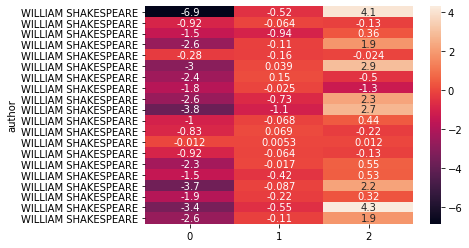

In [69]:
import seaborn as sns
%matplotlib inline

#sns.heatmap(tmpDF[tmpDF['index']=="WILLIAM SHAKESPEARE"].head(10), annot=True)

sns.heatmap(tmpDF.filter(like="WILLIAM SHAKESPEARE",axis=0).head(20), annot=True)

<AxesSubplot:ylabel='author'>

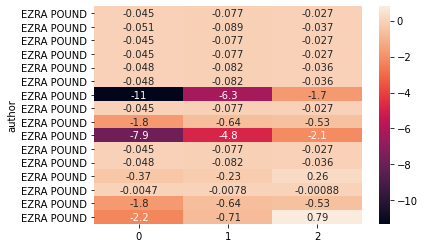

In [59]:
sns.heatmap(tmpDF.filter(like="EZRA POUND",axis=0).head(20), annot=True)

In [73]:
import math 

def CosineSimilarity(vector1,vector2,dimension):
    DotProduct=0
    Dist1=0
    Dist2=0
    for i in range(dimension):
        elem1=0;
        elem2=0;
        if(i<len(vector1)):
            elem1=vector1[i]
        if(i<len(vector2)):
            elem2=vector2[i]
        DotProduct+=elem1*elem2
        Dist1+=math.pow(elem1,2)
        Dist2+=math.pow(elem2,2)
    Dist1=math.sqrt(Dist1)
    Dist2=math.sqrt(Dist2)
    return DotProduct/(Dist1*Dist2)

In [76]:
author_similarity= pd.DataFrame(columns=["author1","author2","title1","title2","similarity"])
for i in range(len(bow)):
    for j in range(i+1,len(bow)):
        if(df['author'][i]!=df['author'][j] or df['poem name'][i]!=df['poem name'][j]):
            similarity=CosineSimilarity(vectorsByType[i],vectorsByType[j],3)
            author_similarity.loc[len(author_similarity.index)]=[df['author'][i],df['author'][j],df['poem name'][i],df['poem name'][j],similarity]
    if(i%10==0):
        print('Done {}.'.format(i))

Done 0.
Done 10.
Done 20.
Done 30.
Done 40.
Done 50.
Done 60.
Done 70.
Done 80.
Done 90.
Done 100.
Done 110.
Done 120.
Done 130.
Done 140.
Done 150.
Done 160.
Done 170.
Done 180.
Done 190.
Done 200.
Done 210.
Done 220.
Done 230.
Done 240.
Done 250.
Done 260.
Done 270.
Done 280.
Done 290.
Done 300.
Done 310.
Done 320.
Done 330.
Done 340.
Done 350.
Done 360.
Done 370.
Done 380.
Done 390.
Done 400.
Done 410.
Done 420.
Done 430.
Done 440.
Done 450.
Done 460.
Done 470.
Done 480.
Done 490.
Done 500.
Done 510.
Done 520.
Done 530.
Done 540.
Done 550.
Done 560.
Done 570.


In [79]:
author_similarity.to_csv('similarities.csv',index=False, encoding='utf-8')

In [81]:
author_df = pd.read_csv('similarities.csv')
author_df.head()

,author1,author2,title1,title2,similarity
0,WILLIAM SHAKESPEARE,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,The Phoenix and the Turtle,An Epilogue to the Above,0.688203
1,WILLIAM SHAKESPEARE,THOMAS BASTARD,The Phoenix and the Turtle,"Book 7, Epigram 42",0.900628
2,WILLIAM SHAKESPEARE,EDMUND SPENSER,The Phoenix and the Turtle,"from The Faerie Queene: Book I, Canto I",0.378722
3,WILLIAM SHAKESPEARE,RICHARD BARNFIELD,The Phoenix and the Turtle,Sonnet 16,0.966931
4,WILLIAM SHAKESPEARE,RICHARD BARNFIELD,The Phoenix and the Turtle,Sonnet 17,0.973451


In [84]:
author_df.shape[0]

163814

In [130]:
def CompareAuthors(author1,author2,author_df):
    count=0
    avgSim=0
    lowestSimilarity=1
    #leastSimilarTitles
    highestSimilarity=0
    #mostSimilarTitles
    for i in range(author_df.shape[0]):
        if((author_df['author1'][i]==author1 and  author_df['author2'][i]==author2)or (author_df['author1'][i]==author2 and  author_df['author2'][i]==author1)):
            count+=1
            avgSim+=author_df['similarity'][i];
            if(lowestSimilarity>author_df['similarity'][i]):
                lowestSimilarity=author_df['similarity'][i]
                leastSimilarTitles= (author_df['title1'][i],author_df['title2'][i])
            if(highestSimilarity<author_df['similarity'][i]):
                highestSimilarity=author_df['similarity'][i]
                mostSimilarTitles= (author_df['title1'][i],author_df['title2'][i])    

    print("Compared Poem Pairs: "+str(count))
    print(author1)
    print(author2)
    avgSim= avgSim/count;

    print("Average Similarity: "+str(avgSim))
    print("Lowest Similarity: "+str(lowestSimilarity ))
    print("Least Similar Titles: "+str(leastSimilarTitles))
    print("Highest Similarity: "+str(highestSimilarity ))
    print("Most Similar Titles: "+str(mostSimilarTitles))

In [131]:
CompareAuthors("WILLIAM SHAKESPEARE","EDMUND SPENSER",author_df)

Compared Poem Pairs: 2414
WILLIAM SHAKESPEARE
EDMUND SPENSER
Average Similarity: 0.8090573409679827
Lowest Similarity: -0.0114793251383811
Least Similar Titles: ('from The Faerie Queene: Book I, Canto I', 'Song of the Witches: Double, double toil and trouble')
Highest Similarity: 0.9999441429238216
Most Similar Titles: ('Sonnet 33: Full many a glorious morning have I seen', 'Amoretti XXX: My Love is like to ice, and I to fire')


In [132]:
CompareAuthors("WILLIAM SHAKESPEARE","WILLIAM SHAKESPEARE",author_df)

Compared Poem Pairs: 2476
WILLIAM SHAKESPEARE
WILLIAM SHAKESPEARE
Average Similarity: 0.8444626051162091
Lowest Similarity: 0.0557643199260672
Least Similar Titles: ('Song: When that I was and a little tiny boy (With hey, ho, the wind and the rain)', 'Sonnet 146: Poor soul, the centre of my sinful earth,')
Highest Similarity: 0.9999791495808776
Most Similar Titles: ('Sonnet 125: Weret aught to me I bore the canopy', 'Sonnet 133: Beshrew that heart that makes my heart to groan')


In [107]:
from glob import glob
topics= glob("topics/*", recursive = True)



In [108]:
import glob


topic_dataframe= pd.DataFrame(columns=["topic","content"])
for topic in topics:
    print(topic)
    topic_name=topic.split("\\")[1]
    for files in glob.glob(topic +"\*.txt"):
        #print(files)
        file = open(files,encoding="utf8")
        #dfElement={'topic':topic_name,'content':file.read()}
        #dfElement=pd.DataFrame([[topic_name,file.read()]],columns=["topic","content"])
        topic_dataframe.loc[len(topic_dataframe.index)]=[topic_name,file.read()]

topics\alone
topics\america
topics\angel
topics\anger
topics\animal
topics\baby
topics\beach
topics\beautiful
topics\beauty
topics\believe
topics\birth
topics\brother
topics\butterfly
topics\car
topics\carpe diem
topics\change
topics\chicago
topics\childhood
topics\children
topics\christmas
topics\cinderella
topics\city
topics\courage
topics\crazy
topics\culture
topics\dance
topics\dark
topics\daughter
topics\death
topics\depression
topics\despair
topics\destiny
topics\dream
topics\evil
topics\faith
topics\family
topics\father
topics\fear
topics\fire
topics\food
topics\football
topics\freedom
topics\friend
topics\frog
topics\funeral
topics\funny
topics\future
topics\girl
topics\god
topics\graduation
topics\greed
topics\green
topics\hair
topics\happiness
topics\happy
topics\hate
topics\heaven
topics\hero
topics\home
topics\hope
topics\house
topics\hunting
topics\husband
topics\identity
topics\innocence
topics\january
topics\joy
topics\june
topics\justice
topics\kiss
topics\laughter
topi

In [109]:
topic_dataframe.size
print(topic_dataframe.head())
print(topic_dataframe.size)

   topic                                            content
0  alone  loneliness\nhis childhood\nwarms him up\nlonel...
1  alone  Sit in a chair\nalone\nPeople I thought were\n...
2  alone  Tell me why it has to be this way\nwhy I must ...
3  alone  A debtor to mercy alone, of covenant mercy I s...
4  alone  A year has been passed since I left home\nAgai...
28670


In [110]:
unique_types=topic_dataframe["topic"].unique()
type_count= unique_types.size
print(type_count)
print(unique_types)

144
['alone' 'america' 'angel' 'anger' 'animal' 'baby' 'beach' 'beautiful'
 'beauty' 'believe' 'birth' 'brother' 'butterfly' 'car' 'carpe diem'
 'change' 'chicago' 'childhood' 'children' 'christmas' 'cinderella' 'city'
 'courage' 'crazy' 'culture' 'dance' 'dark' 'daughter' 'death'
 'depression' 'despair' 'destiny' 'dream' 'evil' 'faith' 'family' 'father'
 'fear' 'fire' 'food' 'football' 'freedom' 'friend' 'frog' 'funeral'
 'funny' 'future' 'girl' 'god' 'graduation' 'greed' 'green' 'hair'
 'happiness' 'happy' 'hate' 'heaven' 'hero' 'home' 'hope' 'house'
 'hunting' 'husband' 'identity' 'innocence' 'january' 'joy' 'june'
 'justice' 'kiss' 'laughter' 'life' 'lonely' 'loss' 'lost' 'love' 'lust'
 'marriage' 'memory' 'mirror' 'money' 'moon' 'mother' 'murder' 'music'
 'nature' 'night' 'ocean' 'paris' 'passion' 'peace' 'pink' 'poem' 'poetry'
 'poverty' 'power' 'racism' 'rain' 'rainbow' 'red' 'remember' 'respect'
 'river' 'romance' 'romantic' 'rose' 'running' 'school' 'sea' 'sick'
 'silver' 'sis

In [111]:
topic_dataframe['Text (Clean)'] = topic_dataframe['content'].apply(lambda x: preprocess(x))

In [112]:
topic_dataframe.head()

,topic,content,Text (Clean)
0,alone,loneliness\nhis childhood\nwarms him up\nlonel...,"[loneli, childhood, warm, loneli, warm, childh..."
1,alone,Sit in a chair\nalone\nPeople I thought were\n...,"[sit, chair, peopl, thought, friend, sit, awai..."
2,alone,Tell me why it has to be this way\nwhy I must ...,"[tell, wai, face, life, sanctuari, thought, st..."
3,alone,"A debtor to mercy alone, of covenant mercy I s...","[debtor, merci, alon, coven, merci, sing, fear..."
4,alone,A year has been passed since I left home\nAgai...,"[year, pass, left, home, life, lone, militari,..."


In [113]:
corpus = topic_dataframe['Text (Clean)']
dictionary = corpora.Dictionary(corpus)
len(dictionary)

48659

In [114]:
bow = [dictionary.doc2bow(text) for text in corpus]

In [116]:
lsiTopic= LsiModel(bow, num_topics=type_count, id2word=dictionary)

In [117]:
vectors= []
fullvectors=[]
print(type_count)
print(lsiType[bow[0]])
for i in range(len(bow)):
    tmp=[]
    lsiResult=lsiType[bow[i]]
    fullvectors.append(lsiResult)
    for j in range(len(lsiResult)):
        tmp.append(lsiResult[j][1])
    vectors.append(tmp)
vectors

144
[(0, -0.4159123786595177), (1, -0.12568149731439907), (2, 0.16844390271820336)]


[[-0.4159123786595177, -0.12568149731439907, 0.16844390271820336],
 [-0.45199145196875523, -0.2552993812181978, 0.10865664983323634],
 [-1.778281309462083, -0.030107009504298073, 0.3216014190138869],
 [-1.1219733722022958, -0.4062608218379209, 0.580550921008417],
 [-1.312875848822473, 0.1992702538765084, 0.19746356823828679],
 [-0.42071829732999133, -0.20670910722388236, -0.08311785538558124],
 [-6.845742294584168, -4.077080550110651, -5.609401235446045],
 [-0.7489714087371838, 0.36454283073637883, -0.26448250420821884],
 [-0.14744088190817756, -0.22091950736782168, -0.1858064919326541],
 [-0.14529298254678796, -0.13330058954251947, -0.15446735013345367],
 [-0.5265350020207599, -0.1658352065968655, -0.27679746564614455],
 [-1.2475720024877048, -0.33380550284303245, 0.535352122674849],
 [-0.7639255134345303, -0.3747675844686558, -0.03582293984968475],
 [-0.4158244424413095, -0.4458920451882678, -0.5005350246157768],
 [-0.5877632024161172, -0.49935137126829077, -0.6966642962469618],
 [-0

Int64Index([300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
            313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
            326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
            339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
            352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
            365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
            378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
            391, 392, 393, 394, 395, 396, 397],
           dtype='int64')


In [128]:
def TopicSimilarities(topic1,topic2,topic_dataframe,vectors):
    topic1_df = topic_dataframe.loc[topic_dataframe['topic'] ==topic1] 
    topic2_df = topic_dataframe.loc[topic_dataframe['topic'] ==topic2] 
    topic_similarity= pd.DataFrame(columns=["similarity"])
    for i in topic1_df.index:
        for j in topic2_df.index:
            similarity=CosineSimilarity(vectors[i],vectors[j],3)
            topic_similarity.loc[len(topic_similarity.index)]=[similarity]
    print("Calculated Cosine Similarities")
    count=0
    avgSim=0
    lowestSimilarity=1
    highestSimilarity=0
    for i in range(topic_similarity.shape[0]):
        count+=1
        avgSim+=topic_similarity['similarity'][i];
        if(lowestSimilarity>topic_similarity['similarity'][i]):
            lowestSimilarity=topic_similarity['similarity'][i]
        if(highestSimilarity<topic_similarity['similarity'][i]):
            highestSimilarity=topic_similarity['similarity'][i]  

    print("Compared Poem Pairs: "+str(count))
    avgSim= avgSim/count;

    print("Average Similarity: "+str(avgSim))
    print("Lowest Similarity: "+str(lowestSimilarity ))
    print("Highest Similarity: "+str(highestSimilarity ))   

In [129]:
TopicSimilarities("alone","anger",topic_dataframe,vectors)

Calculated Cosine Similarities
Compared Poem Pairs: 9800
Average Similarity: 0.8047225463269441
Lowest Similarity: -0.36570550233461546
Highest Similarity: 0.9999874252157993
